# Model for color detection

## Import libraries

In [2]:
import numpy as np
import pandas as pd
import math
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, ConfusionMatrixDisplay, recall_score, classification_report

from google.colab import drive
drive.mount('/content/drive')

seed = 157 # fix randomisation
np.random.seed(seed)
tf.random.set_seed(seed)

Mounted at /content/drive


In [3]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from scikeras.wrappers import KerasClassifier

## Import dataset

In [5]:
color_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UCL/Assessment/color_dataset.csv')
# color_set = pd.read_csv('/Users/mariebourel/Documents/Fac/Master 2022_2023/UCL/cours/CASA0018 - Deep Learning for sensor network /Coursework/color_dataset.csv')


## Data analysis


In [6]:
color_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5052 entries, 0 to 5051
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   red     5052 non-null   int64 
 1   green   5052 non-null   int64 
 2   blue    5052 non-null   int64 
 3   label   5052 non-null   object
dtypes: int64(3), object(1)
memory usage: 158.0+ KB


In [7]:
color_set.head()

,red,green,blue,label
0,20,139,240,Blue
1,174,83,72,Brown
2,144,249,131,Green
3,168,25,156,Pink
4,30,182,136,Green


In [8]:
color_set.columns

Index(['red', 'green', 'blue', 'label'], dtype='object')

In [9]:
nb_col=len(color_set.columns)

## Data Preprocessing


### Data Encoding
Converting the label into binary variables using One-Hot Encoding as there is no order in the label

In [10]:
df_colors = pd.get_dummies(color_set, columns=['label'])
df_colors.head()

,red,green,blue,label_Black,label_Blue,label_Brown,label_Green,label_Grey,label_Orange,label_Pink,label_Purple,label_Red,label_White,label_Yellow
0,20,139,240,0,1,0,0,0,0,0,0,0,0,0
1,174,83,72,0,0,1,0,0,0,0,0,0,0,0
2,144,249,131,0,0,0,1,0,0,0,0,0,0,0
3,168,25,156,0,0,0,0,0,0,1,0,0,0,0
4,30,182,136,0,0,0,1,0,0,0,0,0,0,0


### Data Normalization
Transform the RGB value from 0 to 255 to values from 0 to 1

In [11]:
df_colors['red'] = df_colors['red'] / 255.0
df_colors['green'] = df_colors['green'] / 255.0
df_colors['blue'] = df_colors['blue'] / 255.0

In [14]:
df_colors.head()

,red,green,blue,label_Black,label_Blue,label_Brown,label_Green,label_Grey,label_Orange,label_Pink,label_Purple,label_Red,label_White,label_Yellow
0,0.078431,0.545098,0.941176,0,1,0,0,0,0,0,0,0,0,0
1,0.682353,0.325490,0.282353,0,0,1,0,0,0,0,0,0,0,0
2,0.564706,0.976471,0.513725,0,0,0,1,0,0,0,0,0,0,0
3,0.658824,0.098039,0.611765,0,0,0,0,0,0,1,0,0,0,0
4,0.117647,0.713725,0.533333,0,0,0,1,0,0,0,0,0,0,0


### Function to summarise

In [15]:
def data_prep(df_data):
    # normalization input
    df_data['red'] = df_data['red'] / 255.0
    df_data['green'] = df_data['green'] / 255.0
    df_data['blue'] = df_data['blue'] / 255.0
    
    return df_data

### Split the dataset (70/10/20)

Splitting the dataset into 2 sets:
  - 80% for the training set (used to get the parameters of the model) including 10% for validation set (used to define the hyperparameter and avoid overfitting)
  - 20% for test set (used to test the model on unseen data)

In [16]:
# sample the dataset
df = shuffle(df_colors)

# split between xs an ys
xs, ys = np.split(df.values, [3], axis=1)
#ys = ys.reshape(-1)

In [17]:
xs_train, xs_test, ys_train, ys_test = train_test_split(xs, ys, test_size = 0.2, random_state = seed)

## Modelling

### ANN

#### Model 1

Define and compile the model

In [18]:
# Parameters model 1
nb_layers1 = 2
activation_fct = 'relu'
loss_function = 'mean_squared_error'
optimizer = 'adam'
xs_shape = len(pd.DataFrame(xs_train).keys())

# model 1
model1 = keras.Sequential([
    layers.Dense(3, input_shape=[xs_shape], activation=activation_fct),
    layers.Dense(16, activation = activation_fct),
    layers.Dense(11)
])
model1.summary()

# compile the model 1
model1.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 16)                64        
                                                                 
 dense_2 (Dense)             (None, 11)                187       
                                                                 
Total params: 263
Trainable params: 263
Non-trainable params: 0
_________________________________________________________________


Train the model 1

In [19]:
# fit the model with the Train set
training_history1 = model1.fit(x=xs_train, y=ys_train, 
                               validation_split=0.15, epochs=200,
                               batch_size=100)

# best accuracy 0.4671

Epoch 1/200
35/35 [==============================] - 6s 19ms/step - loss: 0.0941 - accuracy: 0.1028 - val_loss: 0.0838 - val_accuracy: 0.1466
Epoch 2/200
35/35 [==============================] - 0s 10ms/step - loss: 0.0794 - accuracy: 0.2959 - val_loss: 0.0766 - val_accuracy: 0.3493
Epoch 3/200
35/35 [==============================] - 0s 10ms/step - loss: 0.0745 - accuracy: 0.3733 - val_loss: 0.0720 - val_accuracy: 0.3970
Epoch 4/200
35/35 [==============================] - 0s 10ms/step - loss: 0.0698 - accuracy: 0.4211 - val_loss: 0.0665 - val_accuracy: 0.4794
Epoch 5/200
35/35 [==============================] - 0s 13ms/step - loss: 0.0641 - accuracy: 0.4918 - val_loss: 0.0607 - val_accuracy: 0.5404
Epoch 6/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0589 - accuracy: 0.5492 - val_loss: 0.0561 - val_accuracy: 0.5799
Epoch 7/200
35/35 [==============================] - 0s 11ms/step - loss: 0.0548 - accuracy: 0.5763 - val_loss: 0.0528 - val_accuracy: 0.6079
Epoch 

In [20]:
hist1 = pd.DataFrame(training_history1.history)
hist1['epoch'] = training_history1.epoch
hist1.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
195,0.023259,0.843623,0.024297,0.825371,195
196,0.023257,0.841875,0.024326,0.828666,196
197,0.023234,0.844496,0.024393,0.822076,197
198,0.023245,0.843040,0.024339,0.825371,198
199,0.023213,0.843914,0.024327,0.825371,199


In [21]:
# Accuracy on training sets
accuracy_m1_train = model1.evaluate(xs_train, ys_train) # loss: 0.0329 - accuracy: 0.7606

print('Accuracy on train set', accuracy_m1_train)

127/127 [==============================] - 0s 2ms/step - loss: 0.0233 - accuracy: 0.8419
Accuracy on train set [0.02331891842186451, 0.8418708443641663]


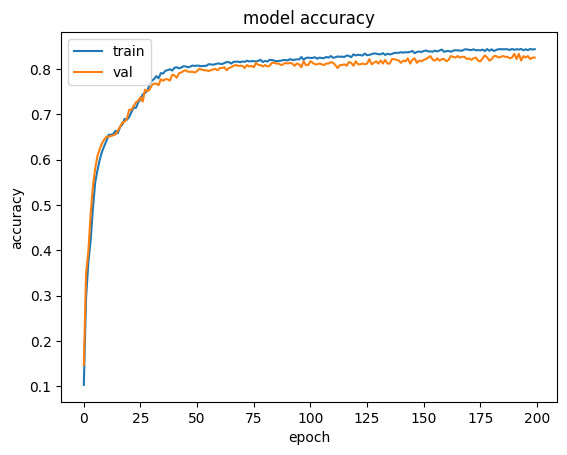

In [22]:
plt.plot(hist1['accuracy'])
plt.plot(hist1['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Evaluate and predict on the test set

In [23]:
model1_test_predict = model1.evaluate(xs_test, ys_test) # loss: 0.0294 - accuracy: 0.7814

32/32 [==============================] - 0s 2ms/step - loss: 0.0251 - accuracy: 0.8220


In [24]:
test_prediction1 = model1.predict(xs_test)
print("shape is {}".format(test_prediction1.shape))  
test_prediction1

32/32 [==============================] - 0s 1ms/step
shape is (1011, 11)


array([[-3.46507654e-02,  2.26003975e-02,  1.50141120e-03, ...,
         5.15416265e-03, -2.24152580e-03,  6.99541867e-02],
       [ 3.90855968e-03,  1.93989158e-01, -2.06230879e-02, ...,
         1.84600949e-02,  9.44747403e-03, -2.32177824e-02],
       [ 1.05476305e-02,  1.01168072e+00, -1.91066563e-02, ...,
        -6.22273982e-03,  4.44689766e-03,  1.92282945e-02],
       ...,
       [-4.45425734e-02,  9.72351059e-02, -1.54867381e-01, ...,
         6.61954820e-01,  5.00406139e-02, -1.20906696e-01],
       [ 4.08203155e-03,  1.00505424e+00, -2.31538117e-02, ...,
         5.03887236e-03, -2.99908221e-04, -1.10924393e-02],
       [-2.87465006e-03,  1.02214682e+00,  5.86999506e-02, ...,
        -2.71674544e-02, -1.50496848e-02,  2.35024095e-03]], dtype=float32)

In [25]:
color_class1 = model1.predict(xs_test)

print(color_class1[8])
print(ys_test[8]) # color 2 ie blue

32/32 [==============================] - 0s 1ms/step
[-0.00601535  0.8722501   0.07394119 -0.02315534 -0.10395803  0.03099319
  0.07501222  0.25113308 -0.02809933 -0.01690364 -0.00422701]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#### Model 2

Define and compile the model

In [26]:
# Parameters model 2
activation_fct = 'relu'
loss_function = 'mean_squared_error'
optimizer = 'adam'

# model 2
model2 = keras.Sequential([
    layers.Dense(3, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct, input_shape=[3]),
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct),
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct),
    layers.Dense(11)
  ])
model2.summary()

# compile the model 2
model2.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 12        
                                                                 
 dense_4 (Dense)             (None, 24)                96        
                                                                 
 dense_5 (Dense)             (None, 24)                600       
                                                                 
 dense_6 (Dense)             (None, 16)                400       
                                                                 
 dense_7 (Dense)             (None, 11)                187       
                                                                 
Total params: 1,295
Trainable params: 1,295
Non-trainable params: 0
_________________________________________________________________


Train the model 2

In [31]:
training_history2 = model2.fit(x=xs_train, y=ys_train, 
                               validation_split=0.15, epochs=200, 
                               batch_size=100, verbose=1,
                               #callbacks=[tfdocs.modeling.EpochDots()], 
                               shuffle=True)

Epoch 1/200
35/35 [==============================] - 2s 6ms/step - loss: 0.1304 - accuracy: 0.2603 - val_loss: 0.1221 - val_accuracy: 0.3394
Epoch 2/200
35/35 [==============================] - 0s 4ms/step - loss: 0.1149 - accuracy: 0.3710 - val_loss: 0.1092 - val_accuracy: 0.3509
Epoch 3/200
35/35 [==============================] - 0s 5ms/step - loss: 0.1028 - accuracy: 0.3815 - val_loss: 0.0977 - val_accuracy: 0.3624
Epoch 4/200
35/35 [==============================] - 0s 5ms/step - loss: 0.0915 - accuracy: 0.3966 - val_loss: 0.0878 - val_accuracy: 0.3806
Epoch 5/200
35/35 [==============================] - 0s 5ms/step - loss: 0.0827 - accuracy: 0.4097 - val_loss: 0.0812 - val_accuracy: 0.3904
Epoch 6/200
35/35 [==============================] - 0s 5ms/step - loss: 0.0772 - accuracy: 0.4275 - val_loss: 0.0775 - val_accuracy: 0.3937
Epoch 7/200
35/35 [==============================] - 0s 5ms/step - loss: 0.0738 - accuracy: 0.4429 - val_loss: 0.0746 - val_accuracy: 0.4036
Epoch 8/200
3

In [42]:
hist2 = pd.DataFrame(training_history2.history)
hist2['epoch'] = training_history2.epoch
hist2.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
195,0.057933,0.520676,0.060509,0.505766,195
196,0.058002,0.518637,0.060156,0.499176,196
197,0.057874,0.521840,0.060418,0.492586,197
198,0.057897,0.520967,0.060640,0.505766,198
199,0.057888,0.521258,0.060182,0.502471,199


In [44]:
# Accuracy on training sets
accuracy_m2_train = model2.evaluate(xs_train, ys_train) # loss: 0.0420 - accuracy: 0.7585

print('Accuracy on train set', accuracy_m2_train)

127/127 [==============================] - 0s 3ms/step - loss: 0.0582 - accuracy: 0.5192
Accuracy on train set [0.058174774050712585, 0.5191784501075745]


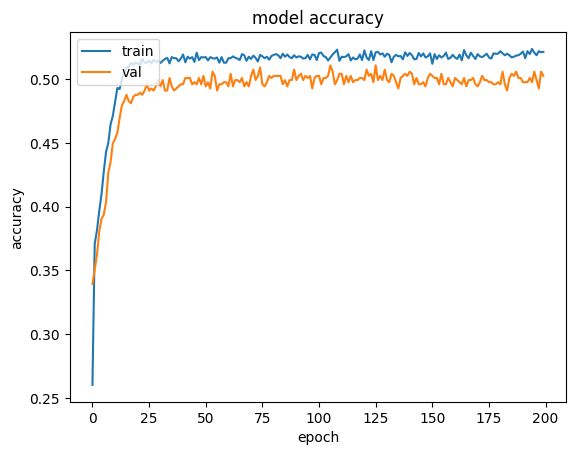

In [43]:
plt.plot(hist2['accuracy'])
plt.plot(hist2['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Predict on the test set

In [32]:
model2_test_predict = model2.evaluate(xs_test, ys_test) #  loss: 0.0430 - accuracy: 0.7349

32/32 [==============================] - 0s 2ms/step - loss: 0.0590 - accuracy: 0.5173


In [33]:
test_prediction2 = model2.predict(xs_test)
print("shape is {}".format(test_prediction2.shape))  
test_prediction2

32/32 [==============================] - 0s 1ms/step
shape is (1011, 11)


array([[ 3.64305750e-02,  3.26583415e-01,  1.63566113e-01, ...,
        -1.02469921e-02, -2.01810151e-03,  1.37073383e-01],
       [ 1.46706495e-03,  1.77323863e-01,  2.81725004e-02, ...,
         1.25632197e-01,  1.11179985e-02,  1.74050534e-03],
       [ 5.71793318e-03,  3.64678800e-01,  1.68541476e-01, ...,
         5.06355911e-02,  1.87953841e-02,  6.42193705e-02],
       ...,
       [ 3.76520120e-03,  1.04415044e-01,  3.31908464e-04, ...,
         1.06790669e-01,  2.92686000e-03,  3.27851553e-03],
       [ 6.31127972e-03,  3.68606448e-01,  1.74363196e-01, ...,
         4.47432175e-02,  1.77852362e-02,  7.03998059e-02],
       [ 1.33698620e-03,  1.81451231e-01,  2.97485515e-02, ...,
         1.26698822e-01,  1.15817040e-02,  1.65342819e-03]], dtype=float32)

#### Model 3

Define and compile the model

In [34]:
# Parameters model 3
activation_fct = 'relu'
loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.Adam(learning_rate=0.001)

# model 3
model3 = keras.Sequential([
    layers.Dense(3, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct, input_shape=(3,)),
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct),
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct),
    layers.Dense(11)
  ])
model3.summary()

# compile the model 3
model3.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 3)                 12        
                                                                 
 dense_9 (Dense)             (None, 24)                96        
                                                                 
 dense_10 (Dense)            (None, 24)                600       
                                                                 
 dense_11 (Dense)            (None, 16)                400       
                                                                 
 dense_12 (Dense)            (None, 11)                187       
                                                                 
Total params: 1,295
Trainable params: 1,295
Non-trainable params: 0
_________________________________________________________________


In [35]:
training_history3 = model3.fit(x=xs_train, y=ys_train, 
                               validation_split=0.15, epochs=200, 
                               batch_size=200, verbose=1,
                               shuffle=True)

Epoch 1/200
18/18 [==============================] - 2s 30ms/step - loss: 2.4328 - accuracy: 0.2070 - val_loss: 2.4140 - val_accuracy: 0.2175
Epoch 2/200
18/18 [==============================] - 0s 5ms/step - loss: 2.3945 - accuracy: 0.3690 - val_loss: 2.3732 - val_accuracy: 0.3839
Epoch 3/200
18/18 [==============================] - 0s 6ms/step - loss: 2.3485 - accuracy: 0.3002 - val_loss: 2.3224 - val_accuracy: 0.1944
Epoch 4/200
18/18 [==============================] - 0s 6ms/step - loss: 2.2913 - accuracy: 0.1776 - val_loss: 2.2603 - val_accuracy: 0.2142
Epoch 5/200
18/18 [==============================] - 0s 6ms/step - loss: 2.2216 - accuracy: 0.2216 - val_loss: 2.1889 - val_accuracy: 0.2142
Epoch 6/200
18/18 [==============================] - 0s 6ms/step - loss: 2.1442 - accuracy: 0.3052 - val_loss: 2.1161 - val_accuracy: 0.3904
Epoch 7/200
18/18 [==============================] - 0s 6ms/step - loss: 2.0669 - accuracy: 0.4540 - val_loss: 2.0432 - val_accuracy: 0.4201
Epoch 8/200


In [36]:
hist3 = pd.DataFrame(training_history3.history)
hist3.tail()

,loss,accuracy,val_loss,val_accuracy
195,1.260823,0.512522,1.347489,0.476112
196,1.259765,0.513395,1.347816,0.479407
197,1.258301,0.514852,1.347751,0.479407
198,1.258659,0.515725,1.358027,0.469522
199,1.260210,0.517181,1.348156,0.477759


In [45]:
# Accuracy on training sets
accuracy_m3_train = model3.evaluate(xs_train, ys_train) # loss: 0.5169 - accuracy: 0.8095

print('Accuracy on train set', accuracy_m3_train)

127/127 [==============================] - 0s 2ms/step - loss: 1.2715 - accuracy: 0.5095
Accuracy on train set [1.2715238332748413, 0.509527325630188]


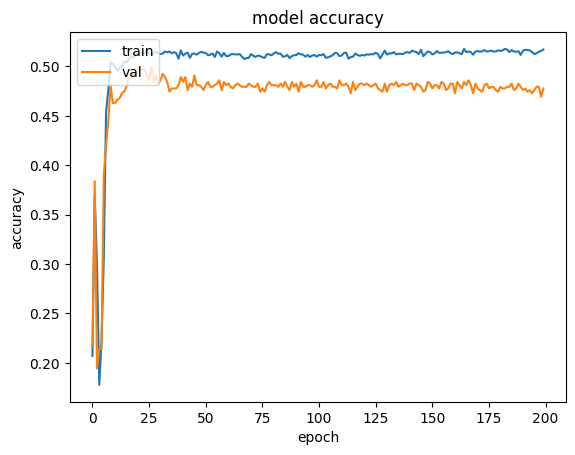

In [38]:
# Accuracy
plt.plot(hist3['accuracy'])
plt.plot(hist3['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

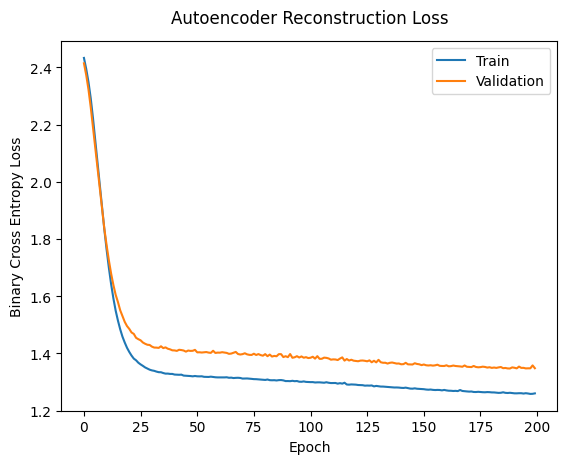

In [39]:
# Loss function
plt.plot(training_history3.history['loss'], label='Train')
plt.plot(training_history3.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

Evaluate and predict on the test set

In [40]:
model3_test_predict = model3.evaluate(xs_test, ys_test) # loss: 0.4480 - accuracy: 0.8546

32/32 [==============================] - 0s 2ms/step - loss: 1.2781 - accuracy: 0.5064


In [41]:
test_prediction3 = model3.predict(xs_test)
print("shape is {}".format(test_prediction3.shape))  
test_prediction3

32/32 [==============================] - 0s 1ms/step
shape is (1011, 11)


array([[ -0.6054141 ,   1.6456604 ,   0.3388511 , ...,  -7.253182  ,
         -3.2306252 ,   1.6169219 ],
       [ -6.120394  ,   2.3712142 ,  -1.1293188 , ...,   1.7189053 ,
         -2.8998725 ,  -9.329772  ],
       [ -3.569851  ,   1.2339079 ,  -0.08382052, ...,  -0.17946142,
         -2.054336  ,  -5.6035557 ],
       ...,
       [ -6.804326  ,   2.7279587 ,  -1.4186577 , ...,   2.0194755 ,
         -3.1907258 , -10.278739  ],
       [ -2.336227  ,   0.92811424,   0.3794538 , ...,  -2.081322  ,
         -1.9479183 ,  -3.5643325 ],
       [ -7.3293304 ,   3.0018058 ,  -1.640762  , ...,   2.2502012 ,
         -3.4139931 , -11.007195  ]], dtype=float32)

#### Model 4


Define and compile the model

In [46]:
# Parameters model 4
activation_fct = 'relu'
loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.Adam(learning_rate=0.001)

# model 4
model4 = keras.Sequential([
    layers.Dense(3, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct, input_shape=(3,)),
    layers.Dense(30, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct),
    layers.Dense(11, activation='softmax')
  ])
model4.summary()

# compile the model 
model4.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 3)                 12        
                                                                 
 dense_14 (Dense)            (None, 30)                120       
                                                                 
 dense_15 (Dense)            (None, 16)                496       
                                                                 
 dense_16 (Dense)            (None, 11)                187       
                                                                 
Total params: 815
Trainable params: 815
Non-trainable params: 0
_________________________________________________________________


In [47]:
training_history4 = model4.fit(x=xs_train, y=ys_train, 
                               validation_split=0.15, epochs=200, 
                               batch_size=200, verbose=1,
                               shuffle=True)

Epoch 1/200


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


18/18 [==============================] - 2s 15ms/step - loss: 2.4214 - accuracy: 0.1176 - val_loss: 2.3975 - val_accuracy: 0.1647
Epoch 2/200
18/18 [==============================] - 0s 6ms/step - loss: 2.3751 - accuracy: 0.1744 - val_loss: 2.3528 - val_accuracy: 0.1582
Epoch 3/200
18/18 [==============================] - 0s 5ms/step - loss: 2.3255 - accuracy: 0.1916 - val_loss: 2.3014 - val_accuracy: 0.1911
Epoch 4/200
18/18 [==============================] - 0s 5ms/step - loss: 2.2664 - accuracy: 0.3244 - val_loss: 2.2333 - val_accuracy: 0.4102
Epoch 5/200
18/18 [==============================] - 0s 6ms/step - loss: 2.1869 - accuracy: 0.3853 - val_loss: 2.1444 - val_accuracy: 0.3855
Epoch 6/200
18/18 [==============================] - 0s 6ms/step - loss: 2.0921 - accuracy: 0.3777 - val_loss: 2.0460 - val_accuracy: 0.3970
Epoch 7/200
18/18 [==============================] - 0s 7ms/step - loss: 1.9913 - accuracy: 0.3925 - val_loss: 1.9421 - val_accuracy: 0.4250
Epoch 8/200
18/18 [=====

In [48]:
hist4 = pd.DataFrame(training_history4.history)
hist4.tail()

,loss,accuracy,val_loss,val_accuracy
195,0.417941,0.869540,0.467943,0.869852
196,0.419797,0.871287,0.466842,0.866557
197,0.417402,0.869540,0.467135,0.853377
198,0.415996,0.869831,0.473280,0.859967
199,0.417553,0.872161,0.466369,0.863262


In [49]:
# Accuracy on training sets
accuracy_m4_train = model4.evaluate(xs_train, ys_train) # loss: 0.4072 - accuracy: 0.8765

print('Accuracy on train set', accuracy_m4_train)

127/127 [==============================] - 0s 2ms/step - loss: 0.4254 - accuracy: 0.8703
Accuracy on train set [0.42538708448410034, 0.8703291416168213]


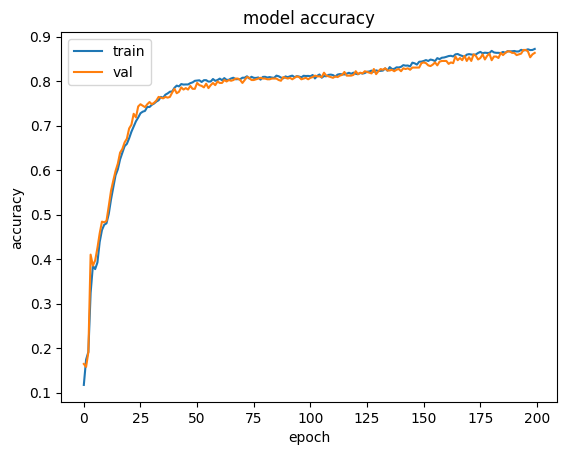

In [87]:
plt.plot(hist4['accuracy'])
plt.plot(hist4['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [51]:
model4_test_predict = model4.evaluate(xs_test, ys_test) # loss: 0.4553 - accuracy: 0.8566

32/32 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.8457


#### Model 5


Define and compile the model

In [52]:
def create_model(activation='relu'):
  # create model
  model5 = keras.Sequential([
    layers.Dense(3, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(3,)),
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='Softmax'),
    layers.Dense(11)
  ])
  # Compile model
  model5.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), 
                 optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
  return model5

In [53]:
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
activation_fct = ['softmax', 'relu']
#activation_fct = ['tanh', 'hard_sigmoid', 'linear', 'sigmoid']
param_grid = dict(optimizer__learning_rate=learn_rate, optimizer__momentum=momentum, model__activation=activation_fct)

# other parameters
loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.Adam(learning_rate=0.001)

# model 5
# create model
model5 = KerasClassifier(model=create_model, epochs=150, batch_size=200, verbose=0)

grid_result5 = GridSearchCV(estimator=model5, param_grid=param_grid, n_jobs=-1, cv=5)

grid_result5.fit(xs_train, ys_train)


/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=KerasClassifier(batch_size=200, epochs=150, model=<function create_model at 0x7fa8c18353a0>, verbose=0),
             n_jobs=-1,
             param_grid={'model__activation': ['softmax', 'relu'],
                         'optimizer__learning_rate': [0.001, 0.01, 0.1, 0.2,
                                                      0.3],
                         'optimizer__momentum': [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]})

In [54]:
# print best parameter after tuning
print(grid_result5.best_params_)
best_param5 = grid_result5.best_params_
  
# print how our model looks after hyper-parameter tuning
print(grid_result5.best_estimator_)

{'model__activation': 'relu', 'optimizer__learning_rate': 0.01, 'optimizer__momentum': 0.2}
KerasClassifier(
	model=<function create_model at 0x7fa8c18353a0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=200
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=150
	model__activation=relu
	optimizer__learning_rate=0.01
	optimizer__momentum=0.2
	class_weight=None
)


In [55]:
# Accuracy
accuracy_model5_train = grid_result5.score(xs_train, ys_train)
model5_test_predict = grid_result5.score(xs_test, ys_test)

print('Accuracy of model (train)', accuracy_model5_train)
print('Accuracy of model (test)', model5_test_predict) 

Accuracy of model (train) 0.48651323929720364
Accuracy of model (test) 0.4609297725024728


#### Model 6

Based on the model 3 parameters, this section will be used to adjust the learning rate

In [67]:
# Parameters model 6
activation_fct = 'relu'
loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.Adam(learning_rate=0.0005)

# model 6
model6 = keras.Sequential([
    layers.Dense(3, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct, input_shape=(3,)),
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct),
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct),
    layers.Dense(11)
  ])
model6.summary()

# compile the model 6
model6.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 3)                 12        
                                                                 
 dense_33 (Dense)            (None, 24)                96        
                                                                 
 dense_34 (Dense)            (None, 24)                600       
                                                                 
 dense_35 (Dense)            (None, 16)                400       
                                                                 
 dense_36 (Dense)            (None, 11)                187       
                                                                 
Total params: 1,295
Trainable params: 1,295
Non-trainable params: 0
_________________________________________________________________


In [68]:
# Fit on training set
training_history6 = model6.fit(x=xs_train, y=ys_train, 
                               validation_split=0.15, epochs=275, 
                               batch_size=300, verbose=0,
                               shuffle=True)


In [69]:
# Accuracy on training sets
accuracy_m6_train = model6.evaluate(xs_train, ys_train) # loss: 0.5171 - accuracy: 0.8288

print('Accuracy on train set', accuracy_m6_train)

127/127 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.8726
Accuracy on train set [0.4236404299736023, 0.8725562691688538]


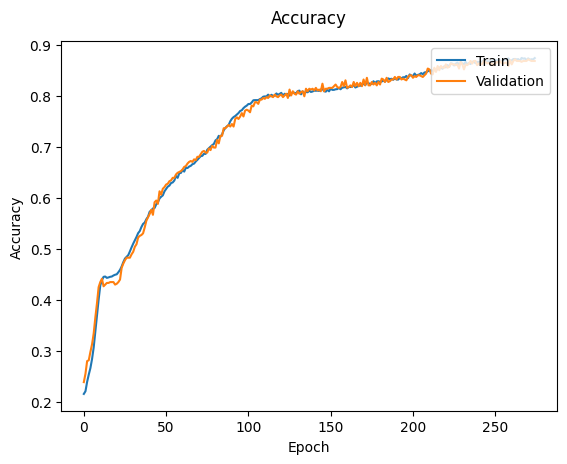

In [70]:
# Accuracy
plt.plot(training_history6.history['accuracy'], label='Train')
plt.plot(training_history6.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Accuracy', pad=13)
plt.legend(loc='upper right')

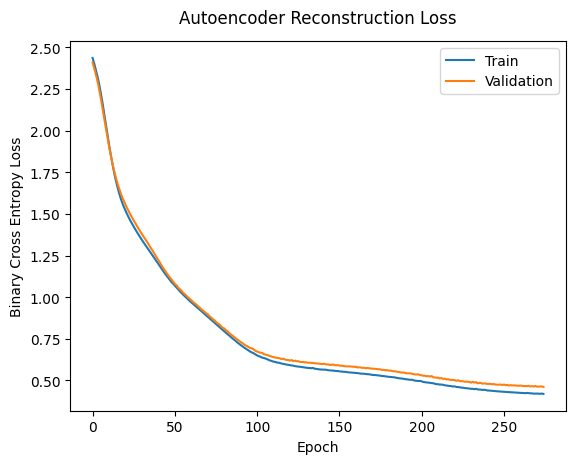

In [71]:
plt.plot(training_history6.history['loss'], label='Train')
plt.plot(training_history6.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

In [72]:
model6_test_predict = model6.evaluate(xs_test, ys_test) # loss: 0.5570 - accuracy: 0.8121

32/32 [==============================] - 0s 4ms/step - loss: 0.4716 - accuracy: 0.8536


#### Model 7

In [73]:
# Parameters model 7
activation_fct = 'relu'
loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.Adam(learning_rate=0.0005)

# model 7
model7 = keras.Sequential([
    layers.Dense(3, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct, input_shape=(3,)),
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct),
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation=activation_fct),
    layers.Dense(11)
  ])
model7.summary()

# compile the model 6
model7.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 3)                 12        
                                                                 
 dense_38 (Dense)            (None, 24)                96        
                                                                 
 dense_39 (Dense)            (None, 24)                600       
                                                                 
 dense_40 (Dense)            (None, 16)                400       
                                                                 
 dense_41 (Dense)            (None, 11)                187       
                                                                 
Total params: 1,295
Trainable params: 1,295
Non-trainable params: 0
_________________________________________________________________


In [74]:
# Fit on training set
training_history7 = model7.fit(x=xs_train, y=ys_train, 
                               validation_split=0.15, epochs=300, 
                               batch_size=315, verbose=0,
                               shuffle=True)


In [75]:
# Accuracy on training sets
accuracy_m7_train = model7.evaluate(xs_train, ys_train) # loss: loss: 0.5633 - accuracy: 0.8052
print('Accuracy on train set', accuracy_m7_train)

127/127 [==============================] - 0s 2ms/step - loss: 0.5416 - accuracy: 0.8142
Accuracy on train set [0.541581928730011, 0.8141549229621887]


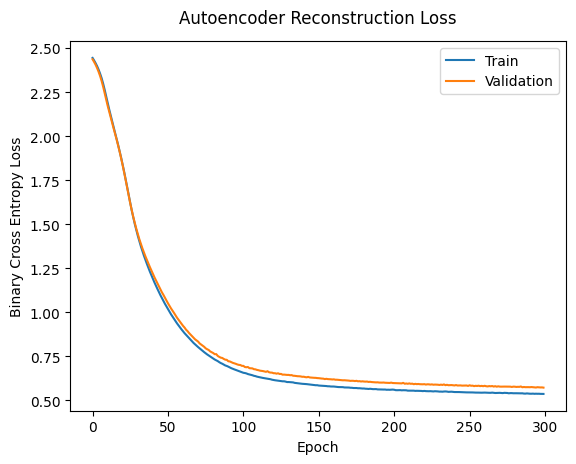

In [76]:
plt.plot(training_history7.history['loss'], label='Train')
plt.plot(training_history7.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

In [77]:
model7_test_predict = model7.evaluate(xs_test, ys_test) # loss: 0.5914 - accuracy: 0.7943

32/32 [==============================] - 0s 3ms/step - loss: 0.5727 - accuracy: 0.7923


## Compare Accuray of all the models

In [78]:
df_accuracy = pd.DataFrame([model1_test_predict, model2_test_predict, model3_test_predict, model4_test_predict, [0, model5_test_predict], model6_test_predict, model7_test_predict])

In [79]:
df_accuracy = df_accuracy.rename({0: 'loss', 1: 'accuracy'}, axis=1)
df_accuracy["model"] = ["model1", "model2", "model3", "model4", "model5", "model6", "model7"]

In [80]:
df_accuracy.sort_values('accuracy') #  => best model is model 4

,loss,accuracy,model
4,0.000000,0.460930,model5
2,1.278066,0.506429,model3
1,0.059013,0.517310,model2
6,0.572663,0.792285,model7
0,0.025057,0.821958,model1
3,0.468993,0.845697,model4
5,0.471632,0.853610,model6


#### Evaluate performances

In [81]:
model4_predictions = model4.predict(xs_test)
model4_predictions

32/32 [==============================] - 0s 1ms/step


array([[3.8277685e-07, 3.2533288e-05, 4.3503351e-05, ..., 5.7033822e-10,
        1.4727033e-04, 1.1672601e-02],
       [1.4368892e-06, 7.7241577e-02, 8.8986326e-07, ..., 3.0093670e-08,
        2.3693733e-06, 2.6485782e-12],
       [5.4317693e-06, 9.9953914e-01, 1.8456771e-09, ..., 4.3472695e-15,
        5.5441300e-09, 1.0052112e-12],
       ...,
       [3.1727621e-13, 1.1148712e-12, 2.4454875e-04, ..., 8.8946205e-01,
        4.2925863e-06, 1.9628530e-09],
       [1.3865206e-04, 9.9793184e-01, 4.0323698e-07, ..., 1.4165298e-12,
        2.5340482e-06, 3.4962075e-09],
       [5.3690222e-08, 9.6069056e-01, 1.6309928e-10, ..., 1.8821774e-13,
        9.6753794e-10, 3.5749838e-16]], dtype=float32)

In [82]:
# convert results into labelled colors
dict_colors = {}

for ind, val in enumerate(list(df_colors.columns.values)[3:]):
    dict_colors[ind] = val

print(dict_colors)

{0: 'label_Black', 1: 'label_Blue', 2: 'label_Brown', 3: 'label_Green', 4: 'label_Grey', 5: 'label_Orange', 6: 'label_Pink', 7: 'label_Purple', 8: 'label_Red', 9: 'label_White', 10: 'label_Yellow'}


In [83]:
def convert_tocolor(predictions):
    pred_max = np.argmax(predictions, axis=1)
    labelled_colors_pred = []
    for i in list(pred_max):
        labelled_colors_pred.append(dict_colors[i])
    return labelled_colors_pred

In [84]:
colors_pred = convert_tocolor(model4_predictions)
colors_pred[0:10]

['label_Green',
 'label_Purple',
 'label_Blue',
 'label_Pink',
 'label_Yellow',
 'label_Grey',
 'label_Pink',
 'label_Pink',
 'label_Blue',
 'label_Green']

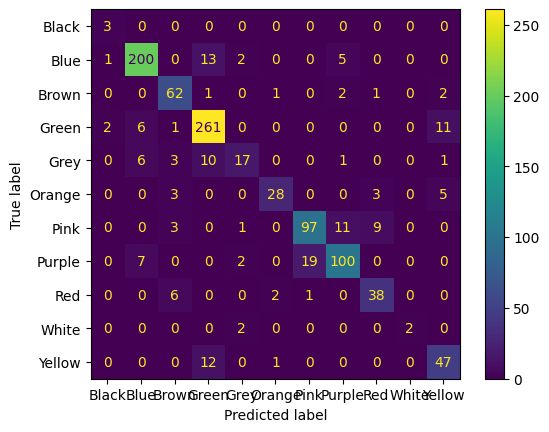

              precision    recall  f1-score   support

       Black       0.50      1.00      0.67         3
        Blue       0.91      0.90      0.91       221
       Brown       0.79      0.90      0.84        69
       Green       0.88      0.93      0.90       281
        Grey       0.71      0.45      0.55        38
      Orange       0.88      0.72      0.79        39
        Pink       0.83      0.80      0.82       121
      Purple       0.84      0.78      0.81       128
         Red       0.75      0.81      0.78        47
       White       1.00      0.50      0.67         4
      Yellow       0.71      0.78      0.75        60

    accuracy                           0.85      1011
   macro avg       0.80      0.78      0.77      1011
weighted avg       0.85      0.85      0.84      1011



In [85]:
target_names = ['Black', 'Blue', 'Brown', 'Green', 'Grey', 'Orange', 'Pink', 'Purple', 'Red', 'White', 'Yellow']
model4_predictions_max = np.argmax(model4_predictions, axis=1)
ys_test_max = np.argmax(ys_test, axis=1)

# Confusion matrix
confusion_mat = confusion_matrix(ys_test_max, model4_predictions_max)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = target_names)
cm_display.plot()
plt.show()

# model performance report
print(classification_report(ys_test_max, model4_predictions_max, target_names=target_names))

Test with other data

In [86]:
xs_test_other = np.array([[250/255, 104/255, 0], [170/255, 0, 255/255]])

convert_tocolor(model4.predict(xs_test_other))

1/1 [==============================] - 0s 22ms/step


['label_Orange', 'label_Purple']

## Towards Arduino

ref: https://colab.research.google.com/github/arduino/ArduinoTensorFlowLiteTutorials/blob/master/GestureToEmoji/arduino_tinyml_workshop.ipynb#scrollTo=0Xn1-Rn9Cp_8

https://colab.research.google.com/github/ucl-casa-ce/casa0018/blob/main/Week4/CASA0018_4_1_train_hello_world_model.ipynb#scrollTo=1muAoUm8lSXL

### Convert the Trained Model n° 4 to Tensor Flow Lite
In the below cell, we convert the model *4* format into TFlite format

In [88]:
import os

MODELS_DIR = 'models/'
if not os.path.exists(MODELS_DIR):
    os.mkdir(MODELS_DIR)
MODEL_TF = MODELS_DIR + 'model'
MODEL_NO_QUANT_TFLITE = MODELS_DIR + 'model_no_quant.tflite'
MODEL_TFLITE = MODELS_DIR + 'model.tflite'
MODEL_TFLITE_MICRO = MODELS_DIR + 'model.cc'

In [89]:
# Save the model to disk
model4.save(MODEL_TF)

In [90]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_TF)
tflite_model = converter.convert()

# Save the model to disk
open(MODEL_NO_QUANT_TFLITE, "wb").write(tflite_model)

5844

In [ ]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_TF)
tflite_model = converter.convert()

# Save the model to disk
open(MODEL_NO_QUANT_TFLITE, "wb").write(tflite_model)

# Define a generator function that provides our test data's x values as a representative dataset, and tell the converter to use it
def representative_dataset_generator():
  for value in xs_test:
    # Each scalar value must be inside of a 2D array that is wrapped in a list
    yield [np.array(value/255, dtype=np.float32, ndmin=3)]

# Indicate that we want to perform the default optimizations, which include quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]

converter.representative_dataset = representative_dataset_generator

# Convert the model
tflite_model = converter.convert()

# Save the model to disk
open(MODEL_TFLITE, "wb").write(tflite_model)

4424

### Generate a TensorFlow Lite for Microcontrollers Model

In [91]:
# Install xxd if it is not available
!apt-get update && apt-get -qq install xxd
# Convert to a C source file, i.e, a TensorFlow Lite for Microcontrollers model
!xxd -i {MODEL_NO_QUANT_TFLITE} > {MODEL_TFLITE_MICRO}

Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:4 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Get:6 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:9 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,125 kB]
Get:10 http://archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [2,308 kB]
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [995 kB]
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1,331 kB]
Hit:13 http://ppa.lau

In [92]:
# Print the C source file
!cat {MODEL_TFLITE_MICRO}

unsigned char models_model_no_quant_tflite[] = {
  0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00,
  0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00, 0x0c, 0x00, 0x00, 0x00,
  0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00,
  0x98, 0x00, 0x00, 0x00, 0xf0, 0x00, 0x00, 0x00, 0xe8, 0x0e, 0x00, 0x00,
  0xf8, 0x0e, 0x00, 0x00, 0x70, 0x16, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00, 0x00, 0x00, 0x0a, 0x00,
  0x10, 0x00, 0x0c, 0x00, 0x08, 0x00, 0x04, 0x00, 0x0a, 0x00, 0x00, 0x00,
  0x0c, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00, 0x3c, 0x00, 0x00, 0x00,
  0x0f, 0x00, 0x00, 0x00, 0x73, 0x65, 0x72, 0x76, 0x69, 0x6e, 0x67, 0x5f,
  0x64, 0x65, 0x66, 0x61, 0x75, 0x6c, 0x74, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x90, 0xff, 0xff, 0xff, 0x0d, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x08, 0x00, 0x00, 0x00, 0x64, 0x65, 0x6e, 0x73,
  0x65, 0x5f, 0x31, 0x36, 0x00, 0x00, 0x00, 0x00, 0x01, 0x00, 0